In [12]:
# Importando as bibliotecas necessárias:
import seaborn as sns
import matplotlib.pyplot as plt

# Importando as bibliotecas Scikit learn:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline


In [2]:
# Importando o dataset:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# Definindo as categorias:
categories = ['talk.religion.misc','soc.religion.christian', 'sci.space', 'comp.graphics']

# Separando em treinamento e teste:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [5]:
# Instânciando o CountVectorizer:
cv = CountVectorizer()

# Instânciando o Naive Bayes Multinomial:
mnb = MultinomialNB()

# Definindo a sequência de ações:
model = make_pipeline(cv, mnb)

In [8]:
# Treinando o modelo:
model.fit(train.data, train.target)

# Validando o modelo:
labels = model.predict(test.data)

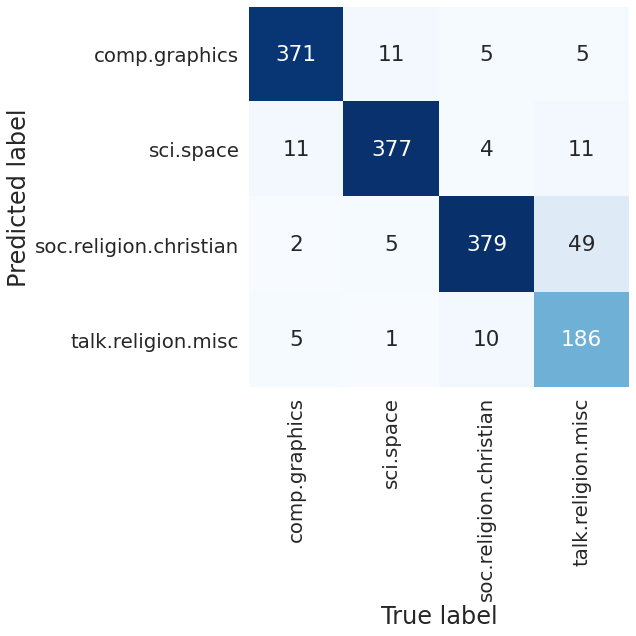

In [10]:
# Plotando a matriz de confusão:
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
# Save figure
plt.savefig("confusion_matrix_text_classification.png", dpi=600)
plt.show()

In [17]:
print('Relatório: \n', classification_report(test.target, labels))

Relatório: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       389
           1       0.94      0.96      0.95       394
           2       0.87      0.95      0.91       398
           3       0.92      0.74      0.82       251

    accuracy                           0.92      1432
   macro avg       0.92      0.90      0.91      1432
weighted avg       0.92      0.92      0.92      1432

